# Mini Project 2

# Importing and Cleaning Dataset

**Importing the relevant libraries**

In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Reading the CSV and checking DataFrame**

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [5]:
df.isna().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [6]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
df = df.drop(labels = 'HDI for year', axis = 1)

In [8]:
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  gdp_for_year ($)   gdp_per_capita ($)  \
0               6.71  Albania1987      2,156,624,900                 796   
1               5.19  Albania1987      2,156,624,900                 796   
2               4.83  Albania1987      2,156,624,900                 796   
3               4.59  Albania1987      2,156,624,900                 796   
4               3.28  Albania1987      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [9]:
df.rename(columns = {'suicides/100k pop': 'suicide_pop', 'gdp_per_capita ($)':'gdp_per_capita', " gdp_for_year ($) ": "gdp_year"}, inplace = True)

df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicide_pop', 'country-year', 'gdp_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [10]:
df['gdp_year'] = df['gdp_year'].str.replace(",","").astype(int)

In [11]:
df.corr()

year  suicides_no  population  suicide_pop  gdp_year  \
year            1.000000    -0.004546    0.008850    -0.039037  0.094529   
suicides_no    -0.004546     1.000000    0.616162     0.306604  0.430096   
population      0.008850     0.616162    1.000000     0.008285  0.710697   
suicide_pop    -0.039037     0.306604    0.008285     1.000000  0.025240   
gdp_year        0.094529     0.430096    0.710697     0.025240  1.000000   
gdp_per_capita  0.339134     0.061330    0.081510     0.001785  0.303405   

                gdp_per_capita  
year                  0.339134  
suicides_no           0.061330  
population            0.081510  
suicide_pop           0.001785  
gdp_year              0.303405  
gdp_per_capita        1.000000

# Exporatory Data Analysis

**1) Global Suicide Analysis**

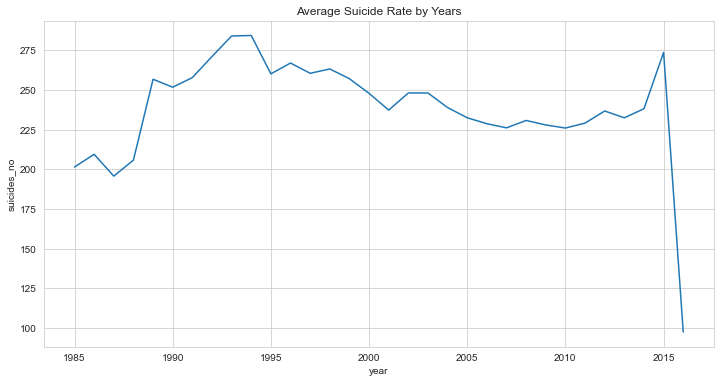

In [12]:
global_suicide = df.groupby('year')[['suicides_no','suicide_pop']].mean().reset_index()

plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.lineplot(x = 'year', y ='suicides_no', data = global_suicide, markers = True)
plt.title('Average Suicide Rate by Years')
plt.show()

**2) Gender and Suicide**

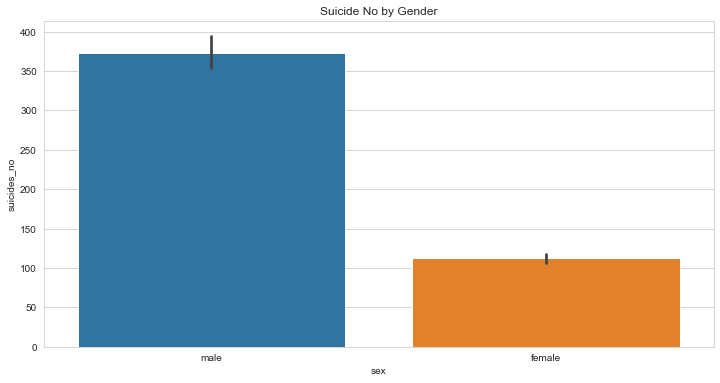

In [13]:
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.barplot(x='sex', y = 'suicides_no', data = df)
plt.title('Suicide No by Gender')
plt.show()

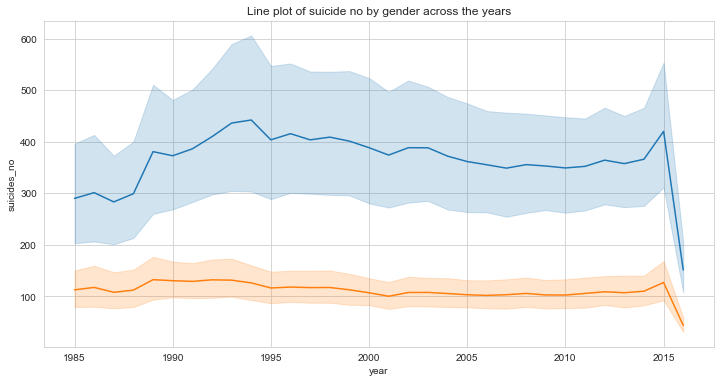

In [14]:
df_male = df[df.sex == 'male']

df_female = df[df.sex == 'female']

plt.figure(figsize = (12,6))
sns.lineplot(x = df_male.year, y = 'suicides_no', data = df)
sns.lineplot(x = df_female.year, y = 'suicides_no', data = df)
plt.title('Line plot of suicide no by gender across the years')
plt.show()

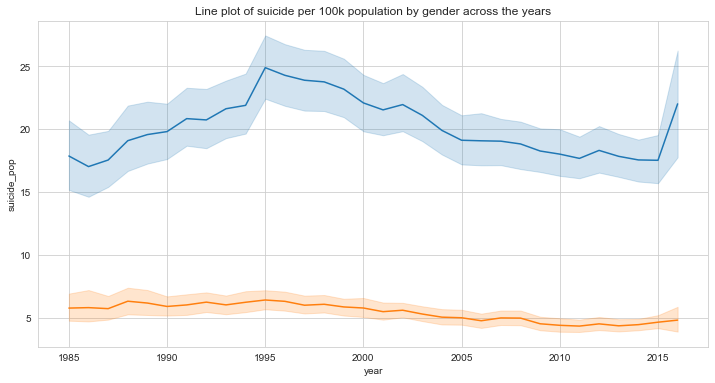

In [15]:
plt.figure(figsize = (12,6))
sns.lineplot(x = df_male.year, y = 'suicide_pop', data = df)
sns.lineplot(x = df_female.year, y = 'suicide_pop', data = df)
plt.title('Line plot of suicide per 100k population by gender across the years')
plt.show()

**3) Age and Suicide**

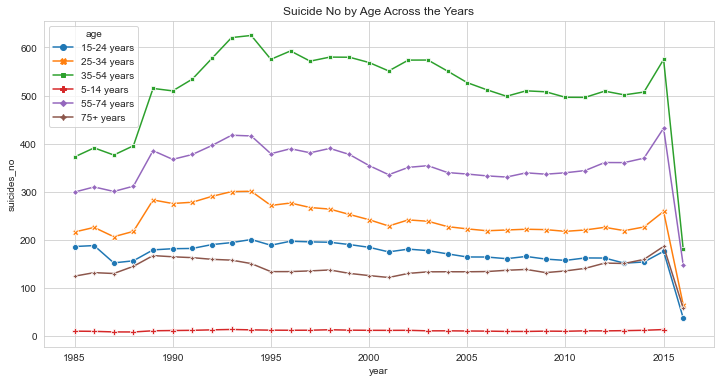

In [16]:
df_age = df.groupby(['age','year'])[['suicides_no','suicide_pop']].mean()
df_age.reset_index()

plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.lineplot(x='year', y = 'suicides_no',hue = 'age',data = df_age, markers = True, style = 'age', dashes = False)
plt.title('Suicide No by Age Across the Years')
plt.show()


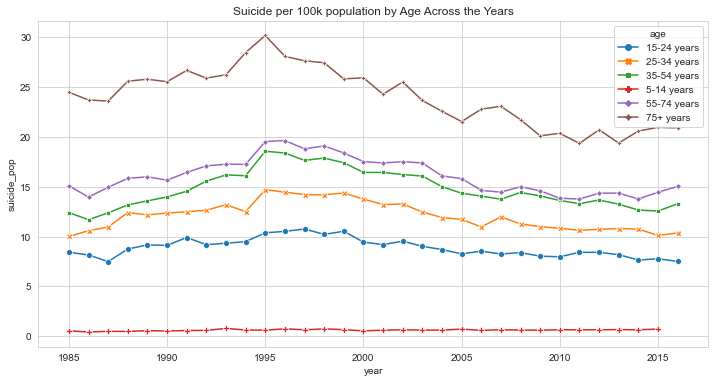

In [17]:
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.lineplot(x='year', y = 'suicide_pop',hue = 'age',data = df_age,markers = True, style = 'age', dashes = False)
plt.title('Suicide per 100k population by Age Across the Years')
plt.show()

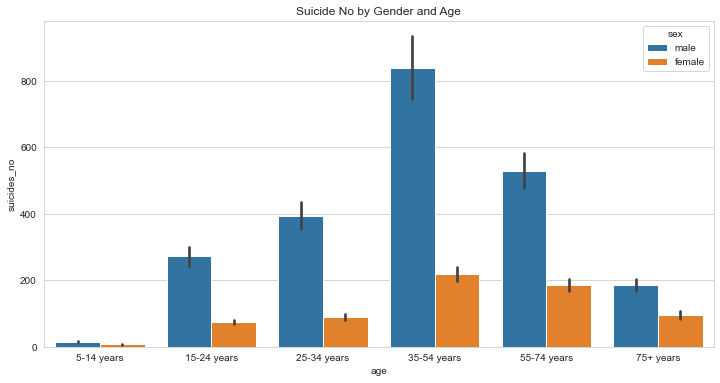

In [18]:
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.barplot(x='age', y = 'suicides_no', hue = 'sex', data = df, order = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('Suicide No by Gender and Age')
plt.show()

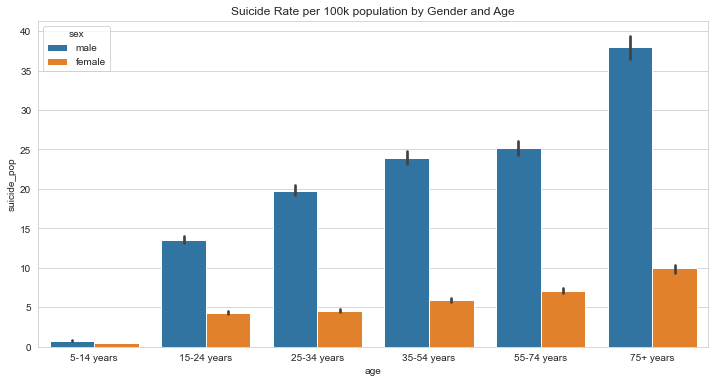

In [19]:
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.barplot(x='age', y = 'suicide_pop', hue = 'sex', data = df, order = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('Suicide Rate per 100k population by Gender and Age')
plt.show()

**4) Generation and Suicide**

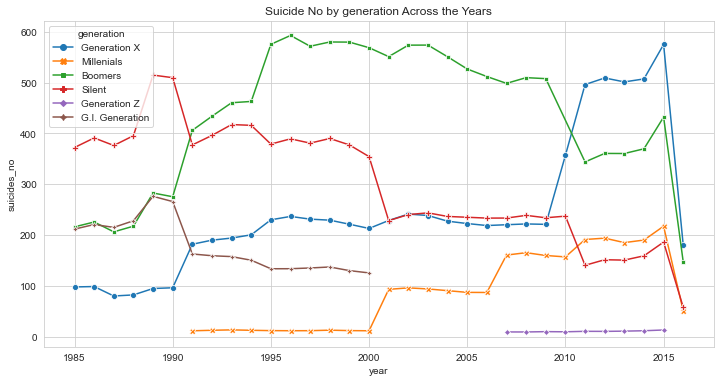

In [20]:
df_generation = df.groupby(['age','year','generation'])[['suicides_no','suicide_pop']].mean()
df_generation.reset_index()

plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.lineplot(x='year', y = 'suicides_no',hue = 'generation',data = df_generation, style = 'generation', markers = True, dashes = False, ci = None)
plt.title('Suicide No by generation Across the Years')
plt.show()



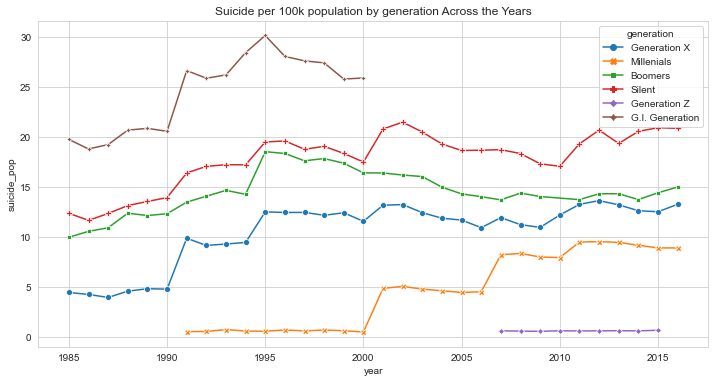

In [21]:
plt.figure(figsize = (12,6))

sns.lineplot(x='year', y = 'suicide_pop',hue = 'generation',data = df_generation, style = 'generation', markers = True, dashes = False, ci = None)
plt.title('Suicide per 100k population by generation Across the Years')
plt.show()


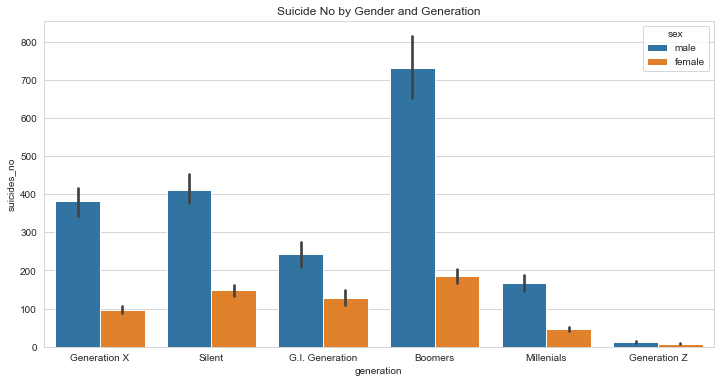

In [22]:
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

sns.barplot(x='generation', y = 'suicides_no',hue = 'sex',data = df)
plt.title('Suicide No by Gender and Generation')
plt.show()

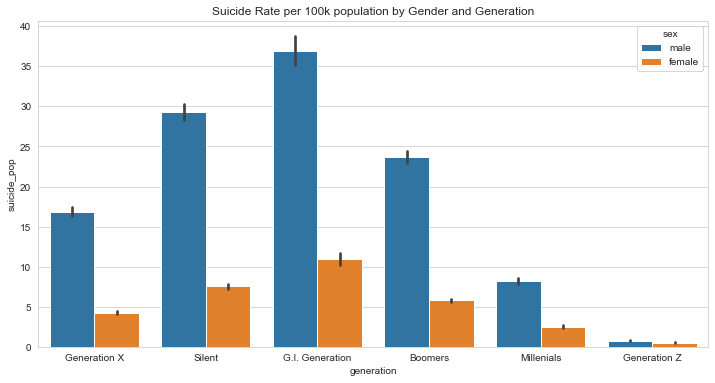

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x='generation', y = 'suicide_pop',hue = 'sex',data = df)
plt.title('Suicide Rate per 100k population by Gender and Generation')
plt.show()

Looking at the EDA for Generation, it looks like there is insufficient data across the years to use `generation` as a predictor variable. As such, I shall exclude `generation` from further analysis

**5)Country & Suicide**

In [24]:
df_country = df.groupby('country').mean().reset_index()

suicides_no = df_country.sort_values(by = 'suicides_no', ascending = False)

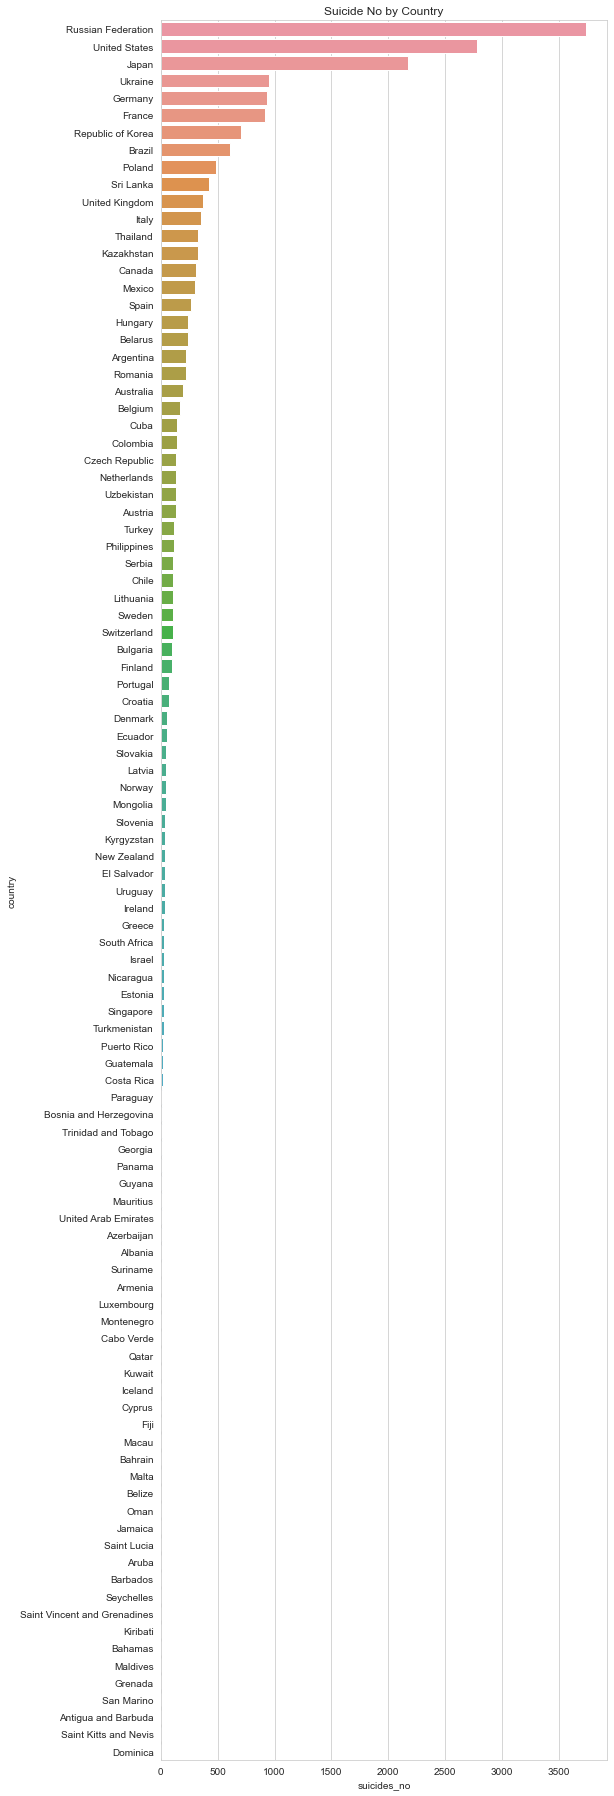

In [25]:
plt.figure(figsize = (8,32))

sns.barplot(x = 'suicides_no', y ='country', data = suicides_no)
plt.title('Suicide No by Country')
plt.show()

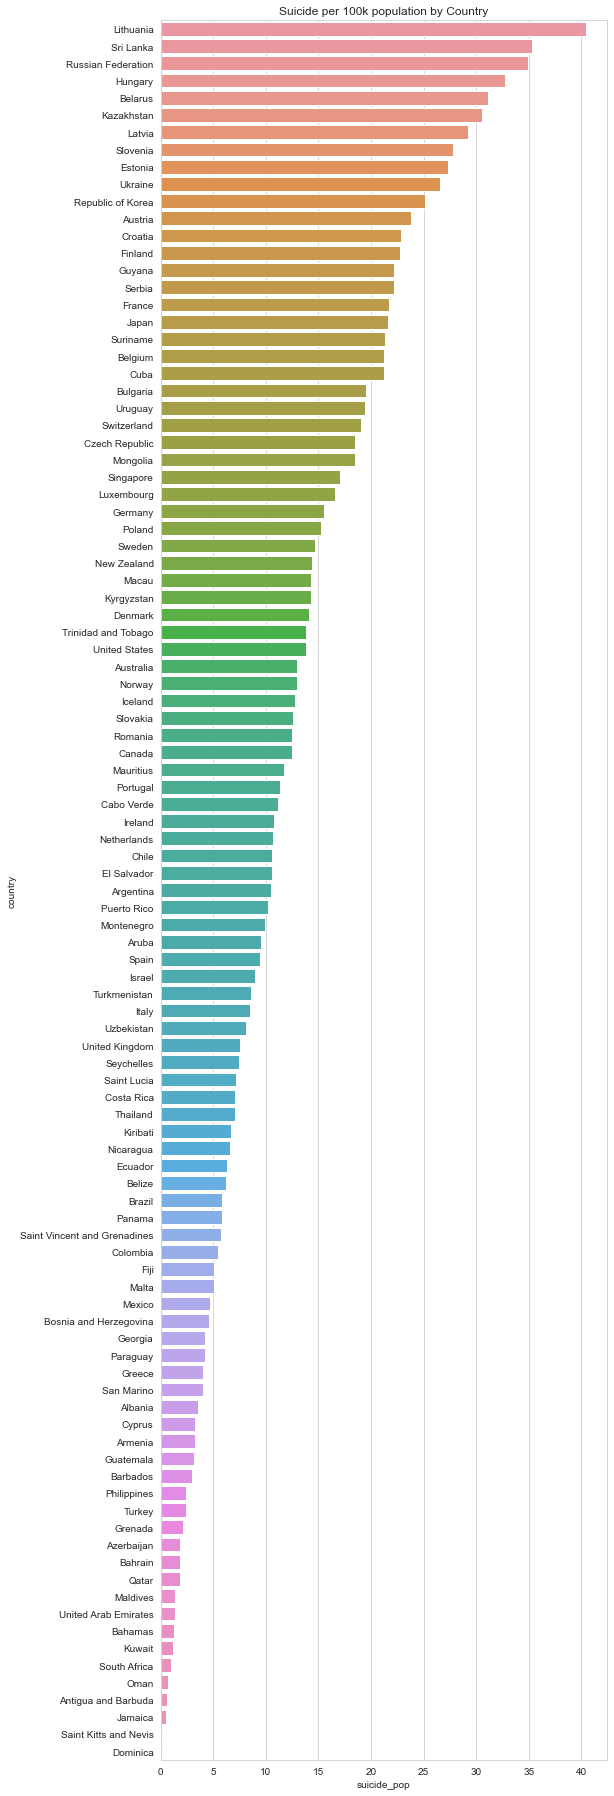

In [26]:
suicides_pop = df_country.sort_values(by = 'suicide_pop', ascending = False)

plt.figure(figsize = (8,32))
sns.barplot(x = 'suicide_pop', y ='country', data = suicides_pop)
plt.title('Suicide per 100k population by Country')
plt.show()

In [27]:
highest_20 = suicides_pop[:20]

highest_20.head(20)

country         year  suicides_no    population  suicide_pop  \
52           Lithuania  2005.419847   107.019084  2.598672e+05    40.415573   
87           Sri Lanka  1997.545455   421.522727  1.382770e+06    35.295152   
75  Russian Federation  2002.000000  3733.771605  1.139137e+07    34.892377   
40             Hungary  2003.419355   238.358065  8.020782e+05    32.761516   
11             Belarus  2001.095238   237.666667  7.832234e+05    31.075913   
47          Kazakhstan  2002.500000   325.467949  1.209980e+06    30.511282   
51              Latvia  2005.000000    50.674603  1.779867e+05    29.259325   
84            Slovenia  2005.000000    42.123016  1.597961e+05    27.827857   
30             Estonia  2005.000000    27.912698  1.075032e+05    27.276905   
95             Ukraine  2000.571429   952.232143  3.828777e+06    26.582321   
73   Republic of Korea  2000.000000   703.575269  3.642325e+06    25.135618   
6              Austria  2000.418848   131.081152  6.383589e+05    23.759764   
22             Croatia  2005.419847    70.339695  3.501158e+05    22.835267   
32             Finland  2001.000000    96.772989  4.078324e+05    22.770431   
39              Guyana  2000.520000    11.420000  5.531530e+04    22.186400   
80              Serbia  2006.500000   111.939815  5.839821e+05    22.164120   
33              France  1999.500000   914.241667  4.640991e+06    21.675694   
46               Japan  2000.000000  2169.091398  9.895228e+06    21.573199   
88            Suriname  1999.928571     6.446429  3.464068e+04    21.316429   
12             Belgium  2000.000000   168.712366  8.153296e+05    21.237903   

        gdp_year  gdp_per_capita  
52  2.771062e+10     9280.549618  
87  1.532645e+10      904.272727  
75  8.843229e+11     6518.814815  
40  8.952380e+10     9370.051613  
11  3.067641e+10     3333.904762  
47  7.868722e+10     5329.115385  
51  1.831660e+10     8961.095238  
84  3.590006e+10    18642.238095  
30  1.444586e+10    11376.095238  
95  8.389111e+10     1867.535714  
73  6.734208e+11    14801.258065  
6   2.660162e+11    34261.780105  
22  4.317814e+10    10355.870229  
32  1.753008e+11    35468.275862  
39  1.120870e+09     1674.920000  
80  3.112522e+10     4471.277778  
33  1.781194e+12    31481.466667  
46  4.339221e+12    36397.548387  
88  1.943388e+09     4351.964286  
12  3.184024e+11    32066.741935

**6) GDP & Suicide**

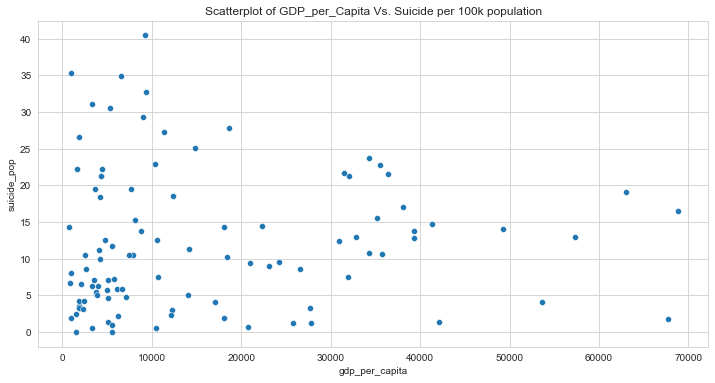

In [28]:
plt.figure(figsize = (12,6))

sns.scatterplot(x = 'gdp_per_capita', y = 'suicide_pop', data = df_country)
plt.title("Scatterplot of GDP_per_Capita Vs. Suicide per 100k population")
plt.show()

In [29]:
df.describe()

year   suicides_no    population   suicide_pop      gdp_year  \
count  27820.000000  27820.000000  2.782000e+04  27820.000000  2.782000e+04   
mean    2001.258375    242.574407  1.844794e+06     12.816097  4.455810e+11   
std        8.469055    902.047917  3.911779e+06     18.961511  1.453610e+12   
min     1985.000000      0.000000  2.780000e+02      0.000000  4.691962e+07   
25%     1995.000000      3.000000  9.749850e+04      0.920000  8.985353e+09   
50%     2002.000000     25.000000  4.301500e+05      5.990000  4.811469e+10   
75%     2008.000000    131.000000  1.486143e+06     16.620000  2.602024e+11   
max     2016.000000  22338.000000  4.380521e+07    224.970000  1.812071e+13   

       gdp_per_capita  
count    27820.000000  
mean     16866.464414  
std      18887.576472  
min        251.000000  
25%       3447.000000  
50%       9372.000000  
75%      24874.000000  
max     126352.000000

In [30]:
df_gdp = df 

bins = list(range(0,180000,30000))
labels = ['0 - 30,000','30,001 - 60,000','60,001 - 90,000','90,001 - 120,000','120,001 - 150,000']

df_gdp['gdp_per_capita'] = pd.cut(df_gdp['gdp_per_capita'], bins = bins, labels = labels)



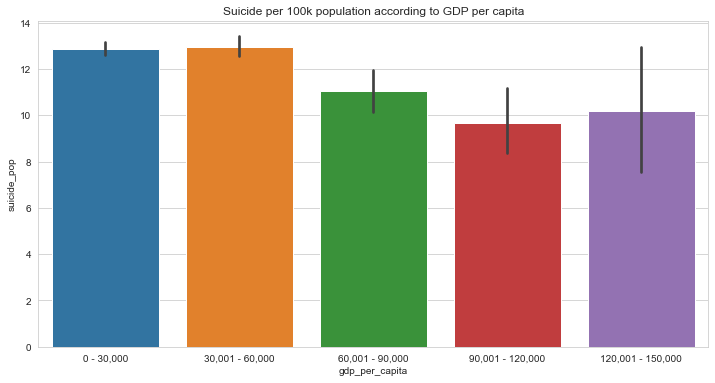

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'gdp_per_capita', y ='suicide_pop', data = df_gdp)
plt.title('Suicide per 100k population according to GDP per capita')
plt.show()

In [32]:
df.corr()

year  suicides_no  population  suicide_pop  gdp_year
year         1.000000    -0.004546    0.008850    -0.039037  0.094529
suicides_no -0.004546     1.000000    0.616162     0.306604  0.430096
population   0.008850     0.616162    1.000000     0.008285  0.710697
suicide_pop -0.039037     0.306604    0.008285     1.000000  0.025240
gdp_year     0.094529     0.430096    0.710697     0.025240  1.000000

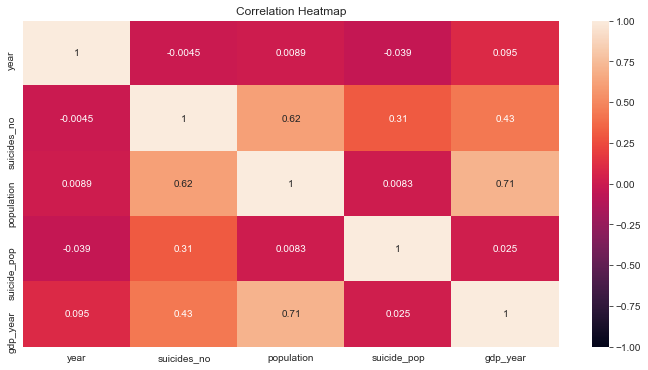

In [33]:
plt.figure(figsize = (12,6))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot= True)



# Machine Learning

**Importing Machine Learning Libraries**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [35]:
X = df[['sex','age','gdp_per_capita','gdp_year','population','country']]
y = df['suicide_pop']

In [36]:
X = pd.get_dummies(X,drop_first = True)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
lin_reg.score(X_test,y_test)

0.5017486633541965

In [42]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [43]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]],y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_train[included + [new_column]],y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1- (((1 - r2)*(n-1))/(n - k - 1)) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = gdp_per_capita_90,001 - 120,000, country_Finland, country_Iceland, country_Bulgaria, country_Malta, country_San Marino, gdp_per_capita_30,001 - 60,000, country_Sri Lanka, country_Cabo Verde, country_Chile, country_Qatar, country_Bahamas, country_Uzbekistan, country_Panama, country_Costa Rica, country_Kazakhstan, country_Croatia, country_Australia, age_75+ years, country_Fiji, country_Belgium, country_Canada, country_Turkey, country_Georgia, country_Denmark, country_New Zealand, country_Azerbaijan, country_Kiribati, country_Guyana, country_Kyrgyzstan, country_Barbados, country_Nicaragua, country_Saint Kitts and Nevis, country_Macau, country_Dominica, country_United Arab Emirates, country_Cuba, country_Romania, country_Netherlands, country_Bosnia and Herzegovina, country_United Kingdom, country_Suriname, country_Guatemala, country_Lithuania, country_Hungary, country_Israel, country_Antigua and Barbuda, country_Sweden, country_Belize, country_Seychelles, country_Estonia

(Step) - Adjusted R^2: This = 0.002; Best = 0.071
(Step) Trying country_Ecuador...
(Step) - Features = country_Ecuador
(Step) - Adjusted R^2: This = 0.001; Best = 0.071
(Step) Trying country_Luxembourg...
(Step) - Features = country_Luxembourg
(Step) - Adjusted R^2: This = 0.000; Best = 0.071
(Step) Trying country_Slovenia...
(Step) - Features = country_Slovenia
(Step) - Adjusted R^2: This = 0.006; Best = 0.071
(Step) Trying country_Serbia...
(Step) - Features = country_Serbia
(Step) - Adjusted R^2: This = 0.002; Best = 0.071
(Step) Trying country_Italy...
(Step) - Features = country_Italy
(Step) - Adjusted R^2: This = 0.001; Best = 0.071
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = gdp_per_capita_120,001 - 150,000
(Step) - Adjusted R^2: This = -0.000; Best = 0.071
(Step) Trying country_France...
(Step) - Features = country_France
(Step) - Adjusted R^2: This = 0.003; Best = 0.071
(Step) Trying country_Puerto Rico...
(Step) - Features = country_Puerto Rico
(Step

(Step) - Adjusted R^2: This = 0.160; Best = 0.157
(Step) - New Best!   : Feature = country_Sri Lanka; R^2 = 0.160; Adjusted R^2 = 0.160
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, country_Cabo Verde
(Step) - Adjusted R^2: This = 0.153; Best = 0.160
(Step) Trying country_Chile...
(Step) - Features = sex_male, country_Chile
(Step) - Adjusted R^2: This = 0.153; Best = 0.160
(Step) Trying country_Qatar...
(Step) - Features = sex_male, country_Qatar
(Step) - Adjusted R^2: This = 0.155; Best = 0.160
(Step) Trying country_Bahamas...
(Step) - Features = sex_male, country_Bahamas
(Step) - Adjusted R^2: This = 0.157; Best = 0.160
(Step) Trying country_Uzbekistan...
(Step) - Features = sex_male, country_Uzbekistan
(Step) - Adjusted R^2: This = 0.153; Best = 0.160
(Step) Trying country_Panama...
(Step) - Features = sex_male, country_Panama
(Step) - Adjusted R^2: This = 0.154; Best = 0.160
(Step) Trying country_Costa Rica...
(Step) - Features = sex_male, country_Costa Rica
(St

(Step) - Adjusted R^2: This = 0.236; Best = 0.241
(Step) Trying country_Costa Rica...
(Step) - Features = sex_male, age_5-14 years, country_Costa Rica
(Step) - Adjusted R^2: This = 0.235; Best = 0.241
(Step) Trying country_Kazakhstan...
(Step) - Features = sex_male, age_5-14 years, country_Kazakhstan
(Step) - Adjusted R^2: This = 0.244; Best = 0.241
(Step) - New Best!   : Feature = country_Kazakhstan; R^2 = 0.244; Adjusted R^2 = 0.244
(Step) Trying country_Croatia...
(Step) - Features = sex_male, age_5-14 years, country_Croatia
(Step) - Adjusted R^2: This = 0.237; Best = 0.244
(Step) Trying country_Australia...
(Step) - Features = sex_male, age_5-14 years, country_Australia
(Step) - Adjusted R^2: This = 0.234; Best = 0.244
(Step) Trying age_75+ years...
(Step) - Features = sex_male, age_5-14 years, age_75+ years
(Step) - Adjusted R^2: This = 0.280; Best = 0.244
(Step) - New Best!   : Feature = age_75+ years; R^2 = 0.280; Adjusted R^2 = 0.280
(Step) Trying country_Fiji...
(Step) - Featu

(Step) - Adjusted R^2: This = 0.234; Best = 0.280
(Step) Trying age_25-34 years...
(Step) - Features = sex_male, age_5-14 years, age_25-34 years
(Step) - Adjusted R^2: This = 0.239; Best = 0.280
(Step) Trying country_Mauritius...
(Step) - Features = sex_male, age_5-14 years, country_Mauritius
(Step) - Adjusted R^2: This = 0.234; Best = 0.280
(Step) Trying country_Singapore...
(Step) - Features = sex_male, age_5-14 years, country_Singapore
(Step) - Adjusted R^2: This = 0.235; Best = 0.280
(Step) Trying country_Austria...
(Step) - Features = sex_male, age_5-14 years, country_Austria
(Step) - Adjusted R^2: This = 0.239; Best = 0.280
(Step) Trying country_Slovakia...
(Step) - Features = sex_male, age_5-14 years, country_Slovakia
(Step) - Adjusted R^2: This = 0.234; Best = 0.280
(Step) Trying country_Russian Federation...
(Step) - Features = sex_male, age_5-14 years, country_Russian Federation
(Step) - Adjusted R^2: This = 0.250; Best = 0.280
(Step) Trying gdp_year...
(Step) - Features = se

(Step) - Adjusted R^2: This = 0.280; Best = 0.287
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Panama
(Step) - Adjusted R^2: This = 0.281; Best = 0.287
(Step) Trying country_Costa Rica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Costa Rica
(Step) - Adjusted R^2: This = 0.281; Best = 0.287
(Step) Trying country_Kazakhstan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Kazakhstan
(Step) - Adjusted R^2: This = 0.289; Best = 0.287
(Step) - New Best!   : Feature = country_Kazakhstan; R^2 = 0.290; Adjusted R^2 = 0.289
(Step) Trying country_Croatia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Croatia
(Step) - Adjusted R^2: This = 0.283; Best = 0.289
(Step) Trying country_Australia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Australia
(Step) - Adjusted R^2: This = 0.280; Best = 0.289
(Step) Trying country_Fiji...
(Step) - Features =

(Step) - Adjusted R^2: This = 0.280; Best = 0.298
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Brazil
(Step) - Adjusted R^2: This = 0.282; Best = 0.298
(Step) Trying country_Aruba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Aruba
(Step) - Adjusted R^2: This = 0.280; Best = 0.298
(Step) Trying country_El Salvador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_El Salvador
(Step) - Adjusted R^2: This = 0.280; Best = 0.298
(Step) Trying age_25-34 years...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, age_25-34 years
(Step) - Adjusted R^2: This = 0.280; Best = 0.298
(Step) Trying country_Mauritius...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Mauritius
(Step) - Adjusted R^2: This = 0.280; Best = 0.298
(Step) Trying country_Singapore...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Singapore
(Step) - Adjusted R^2: This = 

(Step) - Adjusted R^2: This = 0.298; Best = 0.302
(Step) Trying country_Sri Lanka...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Sri Lanka
(Step) - Adjusted R^2: This = 0.305; Best = 0.302
(Step) - New Best!   : Feature = country_Sri Lanka; R^2 = 0.306; Adjusted R^2 = 0.305
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Cabo Verde
(Step) - Adjusted R^2: This = 0.298; Best = 0.305
(Step) Trying country_Chile...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Chile
(Step) - Adjusted R^2: This = 0.298; Best = 0.305
(Step) Trying country_Qatar...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Qatar
(Step) - Adjusted R^2: This = 0.300; Best = 0.305
(Step) Trying country_Bahamas...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Bahamas
(Step) - Adjusted

(Step) - Adjusted R^2: This = 0.298; Best = 0.309
(Step) Trying country_Slovenia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Slovenia
(Step) - Adjusted R^2: This = 0.304; Best = 0.309
(Step) Trying country_Serbia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Serbia
(Step) - Adjusted R^2: This = 0.300; Best = 0.309
(Step) Trying country_Italy...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Italy
(Step) - Adjusted R^2: This = 0.298; Best = 0.309
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, gdp_per_capita_120,001 - 150,000
(Step) - Adjusted R^2: This = 0.298; Best = 0.309
(Step) Trying country_France...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_France
(Step) - Adjusted R^2: This = 0.301; Best = 0.309
(Step) Trying country_Puert

(Step) - Adjusted R^2: This = 0.300; Best = 0.314
(Step) Trying country_Belarus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Belarus
(Step) - Adjusted R^2: This = 0.307; Best = 0.314
(Step) Trying country_Greece...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Greece
(Step) - Adjusted R^2: This = 0.300; Best = 0.314
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Bahrain
(Step) - Adjusted R^2: This = 0.301; Best = 0.314
(Step) Trying country_Germany...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Germany
(Step) - Adjusted R^2: This = 0.298; Best = 0.314
(Step) Trying country_Republic of Korea...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Republic of Korea
(Step) - Adjusted R^2: This = 0.303; Best = 0.314
Added feature country_Russian Federat

(Step) - Adjusted R^2: This = 0.315; Best = 0.324
(Step) Trying country_Suriname...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Suriname
(Step) - Adjusted R^2: This = 0.318; Best = 0.324
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Guatemala
(Step) - Adjusted R^2: This = 0.317; Best = 0.324
(Step) Trying country_Hungary...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary
(Step) - Adjusted R^2: This = 0.326; Best = 0.324
(Step) - New Best!   : Feature = country_Hungary; R^2 = 0.327; Adjusted R^2 = 0.326
(Step) Trying country_Israel...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Israel
(Step) - Adjusted R^2: This = 0.315; Best = 0.326
(Step) Trying country_Antigua and 

(Step) - Adjusted R^2: This = 0.314; Best = 0.326
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Oman
(Step) - Adjusted R^2: This = 0.315; Best = 0.326
(Step) Trying country_South Africa...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_South Africa
(Step) - Adjusted R^2: This = 0.318; Best = 0.326
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Thailand
(Step) - Adjusted R^2: This = 0.315; Best = 0.326
(Step) Trying country_Uruguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Uruguay
(Step) - Adjusted R^2: This = 0.316; Best = 0.326
(Step) Trying country_Montenegro...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, 

(Step) - Adjusted R^2: This = 0.326; Best = 0.336
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Saint Kitts and Nevis
(Step) - Adjusted R^2: This = 0.326; Best = 0.336
(Step) Trying country_Macau...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Macau
(Step) - Adjusted R^2: This = 0.326; Best = 0.336
(Step) Trying country_Dominica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Dominica
(Step) - Adjusted R^2: This = 0.326; Best = 0.336
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_United Arab Emirates
(Step) - Adjusted R^2: This = 0.327; Best = 0.336
(S

(Step) - Adjusted R^2: This = 0.326; Best = 0.336
(Step) Trying country_Ukraine...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Ukraine
(Step) - Adjusted R^2: This = 0.332; Best = 0.336
(Step) Trying country_Latvia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Latvia
(Step) - Adjusted R^2: This = 0.334; Best = 0.336
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Grenada
(Step) - Adjusted R^2: This = 0.329; Best = 0.336
(Step) Trying country_Poland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Poland
(Step) - Adjusted R^2: This = 0.326; Best = 0.336
(Step) Trying country_Turkmenistan...
(Step) - Features = 

(Step) - Adjusted R^2: This = 0.336; Best = 0.344
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Fiji
(Step) - Adjusted R^2: This = 0.337; Best = 0.344
(Step) Trying country_Belgium...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belgium
(Step) - Adjusted R^2: This = 0.339; Best = 0.344
(Step) Trying country_Canada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Canada
(Step) - Adjusted R^2: This = 0.336; Best = 0.344
(Step) Trying country_Turkey...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Turkey
(Step) - Adjusted R^2: This = 0.33

(Step) - Adjusted R^2: This = 0.336; Best = 0.344
(Step) Trying country_France...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_France
(Step) - Adjusted R^2: This = 0.340; Best = 0.344
(Step) Trying country_Puerto Rico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Puerto Rico
(Step) - Adjusted R^2: This = 0.336; Best = 0.344
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Brazil
(Step) - Adjusted R^2: This = 0.337; Best = 0.344
(Step) Trying country_Aruba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Aruba
(Step) - Adjusted R^2: T

(Step) - Adjusted R^2: This = 0.336; Best = 0.345
(Step) Trying country_Republic of Korea...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Republic of Korea
(Step) - Adjusted R^2: This = 0.342; Best = 0.345
Added feature country_Belarus with R^2 = 0.346 and adjusted R^2 = 0.345

(Step) Excluded = gdp_per_capita_90,001 - 120,000, country_Finland, country_Iceland, country_Bulgaria, country_Malta, country_San Marino, gdp_per_capita_30,001 - 60,000, country_Sri Lanka, country_Cabo Verde, country_Chile, country_Qatar, country_Bahamas, country_Uzbekistan, country_Panama, country_Costa Rica, country_Croatia, country_Australia, country_Fiji, country_Belgium, country_Canada, country_Turkey, country_Georgia, country_Denmark, country_New Zealand, country_Azerbaijan, country_Kiribati, country_Guyana, country_Kyrgyzstan, country_Barbados, country_Nicaragua, country_Saint Kitts and Nevis, count

(Step) - Adjusted R^2: This = 0.345; Best = 0.353
(Step) Trying country_United Kingdom...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_United Kingdom
(Step) - Adjusted R^2: This = 0.346; Best = 0.353
(Step) Trying country_Suriname...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Suriname
(Step) - Adjusted R^2: This = 0.349; Best = 0.353
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Guatemala
(Step) - Adjusted R^2: This = 0.348; Best = 0.353
(Step) Trying country_Israel...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country

(Step) - Adjusted R^2: This = 0.348; Best = 0.354
(Step) Trying country_Poland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Poland
(Step) - Adjusted R^2: This = 0.346; Best = 0.354
(Step) Trying country_Turkmenistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Turkmenistan
(Step) - Adjusted R^2: This = 0.346; Best = 0.354
(Step) Trying country_Saint Vincent and Grenadines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Saint Vincent and Grenadines
(Step) - Adjusted R^2: This = 0.346; Best = 0.354
(Step) Trying country_Switzerland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, 

(Step) - Adjusted R^2: This = 0.357; Best = 0.362
(Step) Trying country_Uzbekistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Uzbekistan
(Step) - Adjusted R^2: This = 0.354; Best = 0.362
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Panama
(Step) - Adjusted R^2: This = 0.355; Best = 0.362
(Step) Trying country_Costa Rica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Costa Rica
(Step) - Adjusted R^2: This = 0.355; Best = 0.362
(Step) Trying country_Croatia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuan

(Step) - Adjusted R^2: This = 0.354; Best = 0.362
(Step) Trying country_Estonia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Estonia
(Step) - Adjusted R^2: This = 0.360; Best = 0.362
(Step) Trying country_Paraguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Paraguay
(Step) - Adjusted R^2: This = 0.356; Best = 0.362
(Step) Trying country_Japan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Japan
(Step) - Adjusted R^2: This = 0.358; Best = 0.362
(Step) Trying country_Saint Lucia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, coun

(Step) - Adjusted R^2: This = 0.354; Best = 0.362
(Step) Trying country_South Africa...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_South Africa
(Step) - Adjusted R^2: This = 0.357; Best = 0.362
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Thailand
(Step) - Adjusted R^2: This = 0.355; Best = 0.362
(Step) Trying country_Uruguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Uruguay
(Step) - Adjusted R^2: This = 0.356; Best = 0.362
(Step) Trying country_Montenegro...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Li

(Step) - Adjusted R^2: This = 0.362; Best = 0.367
(Step) Trying country_New Zealand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_New Zealand
(Step) - Adjusted R^2: This = 0.362; Best = 0.367
(Step) Trying country_Azerbaijan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Azerbaijan
(Step) - Adjusted R^2: This = 0.363; Best = 0.367
(Step) Trying country_Kiribati...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Kiribati
(Step) - Adjusted R^2: This = 0.362; Best = 0.367
(Step) Trying country_Guyana...
(Step) - Featu

(Step) - Adjusted R^2: This = 0.362; Best = 0.369
(Step) Trying country_France...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_France
(Step) - Adjusted R^2: This = 0.366; Best = 0.369
(Step) Trying country_Puerto Rico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Puerto Rico
(Step) - Adjusted R^2: This = 0.362; Best = 0.369
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Brazil
(Step) - Adjusted R^2: This = 0.363; Best = 0.369
(Step) Trying country_Aruba...
(Step) - Features = sex_mal

(Step) - Adjusted R^2: This = 0.363; Best = 0.369
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, population
(Step) - Adjusted R^2: This = 0.362; Best = 0.369
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Mexico
(Step) - Adjusted R^2: This = 0.363; Best = 0.369
(Step) Trying country_Greece...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Greece
(Step) - Adjusted R^2: This = 0.364; Best = 0.369
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 year

(Step) - Adjusted R^2: This = 0.369; Best = 0.374
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_United Arab Emirates
(Step) - Adjusted R^2: This = 0.370; Best = 0.374
(Step) Trying country_Cuba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Cuba
(Step) - Adjusted R^2: This = 0.373; Best = 0.374
(Step) Trying country_Romania...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Romania
(Step) - Adjusted R^2: This = 0.369; B

(Step) - Adjusted R^2: This = 0.369; Best = 0.376
(Step) Trying country_Mongolia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Mongolia
(Step) - Adjusted R^2: This = 0.369; Best = 0.376
(Step) Trying country_Norway...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Norway
(Step) - Adjusted R^2: This = 0.369; Best = 0.376
(Step) Trying country_Ukraine...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine
(Step) - Adjusted R^2: This = 0.377; Best = 0.376
(Step) -

(Step) - Adjusted R^2: This = 0.377; Best = 0.382
(Step) Trying country_Chile...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Chile
(Step) - Adjusted R^2: This = 0.377; Best = 0.382
(Step) Trying country_Qatar...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Qatar
(Step) - Adjusted R^2: This = 0.379; Best = 0.382
(Step) Trying country_Bahamas...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Bahamas
(Step) - Adjust

(Step) - Adjusted R^2: This = 0.377; Best = 0.382
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Belize
(Step) - Adjusted R^2: This = 0.378; Best = 0.382
(Step) Trying country_Seychelles...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Seychelles
(Step) - Adjusted R^2: This = 0.377; Best = 0.382
(Step) Trying country_Estonia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Estonia
(St

(Step) - Adjusted R^2: This = 0.377; Best = 0.384
(Step) Trying country_Turkmenistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Turkmenistan
(Step) - Adjusted R^2: This = 0.377; Best = 0.384
(Step) Trying country_Saint Vincent and Grenadines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Saint Vincent and Grenadines
(Step) - Adjusted R^2: This = 0.378; Best = 0.384
(Step) Trying country_Switzerland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, co

(Step) - Adjusted R^2: This = 0.384; Best = 0.389
(Step) Trying country_Chile...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Chile
(Step) - Adjusted R^2: This = 0.384; Best = 0.389
(Step) Trying country_Qatar...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Qatar
(Step) - Adjusted R^2: This = 0.385; Best = 0.389
(Step) Trying country_Bahamas...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slov

(Step) - Adjusted R^2: This = 0.384; Best = 0.389
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Belize
(Step) - Adjusted R^2: This = 0.384; Best = 0.389
(Step) Trying country_Seychelles...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Seychelles
(Step) - Adjusted R^2: This = 0.384; Best = 0.389
(Step) Trying country_Estonia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, 

(Step) - Adjusted R^2: This = 0.384; Best = 0.391
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Oman
(Step) - Adjusted R^2: This = 0.384; Best = 0.391
(Step) Trying country_South Africa...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_South Africa
(Step) - Adjusted R^2: This = 0.386; Best = 0.391
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka,

(Step) - Adjusted R^2: This = 0.391; Best = 0.396
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Fiji
(Step) - Adjusted R^2: This = 0.391; Best = 0.396
(Step) Trying country_Belgium...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Belgium
(Step) - Adjusted R^2: This = 0.395; Best = 0.396
(Step) Trying country_Canada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latv

(Step) - Adjusted R^2: This = 0.391; Best = 0.397
(Step) Trying country_Maldives...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Maldives
(Step) - Adjusted R^2: This = 0.391; Best = 0.397
(Step) Trying country_Colombia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Colombia
(Step) - Adjusted R^2: This = 0.392; Best = 0.397
(Step) Trying country_Ecuador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, c

(Step) - Adjusted R^2: This = 0.393; Best = 0.397
(Step) Trying country_Montenegro...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Montenegro
(Step) - Adjusted R^2: This = 0.391; Best = 0.397
(Step) Trying age_35-54 years...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, age_35-54 years
(Step) - Adjusted R^2: This = 0.393; Best = 0.397
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, 

(Step) - Adjusted R^2: This = 0.398; Best = 0.403
(Step) Trying country_Georgia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, country_Georgia
(Step) - Adjusted R^2: This = 0.398; Best = 0.403
(Step) Trying country_Denmark...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, country_Denmark
(Step) - Adjusted R^2: This = 0.397; Best = 0.403
(Step) Trying country_New Zealand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, coun

(Step) - Adjusted R^2: This = 0.397; Best = 0.403
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, gdp_per_capita_120,001 - 150,000
(Step) - Adjusted R^2: This = 0.397; Best = 0.403
(Step) Trying country_France...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, country_France
(Step) - Adjusted R^2: This = 0.402; Best = 0.403
(Step) Trying country_Puerto Rico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian F

(Step) - Adjusted R^2: This = 0.398; Best = 0.404
(Step) Trying country_Czech Republic...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, country_Czech Republic
(Step) - Adjusted R^2: This = 0.399; Best = 0.404
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, population
(Step) - Adjusted R^2: This = 0.398; Best = 0.404
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, count

(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, country_Kyrgyzstan
(Step) - Adjusted R^2: This = 0.404; Best = 0.409
(Step) Trying country_Barbados...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, country_Barbados
(Step) - Adjusted R^2: This = 0.405; Best = 0.409
(Step) Trying country_Nicaragua...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvi

(Step) - Adjusted R^2: This = 0.403; Best = 0.409
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, country_Brazil
(Step) - Adjusted R^2: This = 0.404; Best = 0.409
(Step) Trying country_Aruba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, country_Aruba
(Step) - Adjusted R^2: This = 0.403; Best = 0.409
(Step) Trying country_El Salvador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Feder

(Step) - Adjusted R^2: This = 0.405; Best = 0.409
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, country_Philippines
(Step) - Adjusted R^2: This = 0.404; Best = 0.409
(Step) Trying country_Czech Republic...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, country_Czech Republic
(Step) - Adjusted R^2: This = 0.406; Best = 0.409
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, co

(Step) - Adjusted R^2: This = 0.413; Best = 0.415
(Step) Trying country_Kyrgyzstan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Kyrgyzstan
(Step) - Adjusted R^2: This = 0.410; Best = 0.415
(Step) Trying country_Barbados...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Barbados
(Step) - Adjusted R^2: This = 0.411; Best = 0.415
(Step) Trying country_Nicaragua...
(Step) - Features = sex_male, age_5-14 years, age_75+ y

(Step) - Adjusted R^2: This = 0.409; Best = 0.415
(Step) Trying country_France...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_France
(Step) - Adjusted R^2: This = 0.414; Best = 0.415
(Step) Trying country_Puerto Rico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Puerto Rico
(Step) - Adjusted R^2: This = 0.409; Best = 0.415
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years,

(Step) - Adjusted R^2: This = 0.409; Best = 0.415
(Step) Trying country_Jamaica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Jamaica
(Step) - Adjusted R^2: This = 0.411; Best = 0.415
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Philippines
(Step) - Adjusted R^2: This = 0.410; Best = 0.415
(Step) Trying country_Czech Republic...
(Step) - Features = sex_male, age_5-14 years, age_

(Step) - Adjusted R^2: This = 0.415; Best = 0.419
(Step) Trying country_New Zealand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_New Zealand
(Step) - Adjusted R^2: This = 0.415; Best = 0.419
(Step) Trying country_Azerbaijan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Azerbaijan
(Step) - Adjusted R^2: This = 0.416; Best = 0.419
(Step) Trying country_Kiribati...
(Step) - Feature

(Step) - Adjusted R^2: This = 0.415; Best = 0.420
(Step) Trying country_Luxembourg...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Luxembourg
(Step) - Adjusted R^2: This = 0.416; Best = 0.420
(Step) Trying country_Serbia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Serbia
(Step) - Adjusted R^2: This = 0.418; Best = 0.420
(Step) Trying country_Italy...
(Step) - Features = sex_male,

(Step) - Adjusted R^2: This = 0.417; Best = 0.420
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Thailand
(Step) - Adjusted R^2: This = 0.415; Best = 0.420
(Step) Trying country_Uruguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Uruguay
(Step) - Adjusted R^2: This = 0.417; Best = 0.420
(Step) Trying country_Montenegro...
(Step) - Features = sex_ma

(Step) - Adjusted R^2: This = 0.420; Best = 0.423
(Step) Trying country_Croatia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Croatia
(Step) - Adjusted R^2: This = 0.424; Best = 0.423
(Step) - New Best!   : Feature = country_Croatia; R^2 = 0.427; Adjusted R^2 = 0.424
(Step) Trying country_Australia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Austra

(Step) - Adjusted R^2: This = 0.421; Best = 0.425
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Belize
(Step) - Adjusted R^2: This = 0.420; Best = 0.425
(Step) Trying country_Seychelles...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Seychelles
(Step) - Adjusted R^2: This = 0.420; Best = 0.425
(Step) Trying country_Paraguay

(Step) - Adjusted R^2: This = 0.422; Best = 0.425
(Step) Trying country_Mauritius...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Mauritius
(Step) - Adjusted R^2: This = 0.420; Best = 0.425
(Step) Trying country_Singapore...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Singapore
(Step) - Adjusted R^2: This = 0.422; Best = 0.425
(Step) Trying country_Slov

(Step) - Adjusted R^2: This = 0.422; Best = 0.425
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Philippines
(Step) - Adjusted R^2: This = 0.421; Best = 0.425
(Step) Trying country_Czech Republic...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Czech Republic
(Step) - Adjusted R^2: This = 0.422; Best = 0.425
(Step) Tryin

(Step) - Adjusted R^2: This = 0.430; Best = 0.430
(Step) - New Best!   : Feature = country_Belgium; R^2 = 0.432; Adjusted R^2 = 0.430
(Step) Trying country_Canada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_Canada
(Step) - Adjusted R^2: This = 0.425; Best = 0.430
(Step) Trying country_Turkey...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, c

(Step) - Adjusted R^2: This = 0.426; Best = 0.430
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_Belize
(Step) - Adjusted R^2: This = 0.425; Best = 0.430
(Step) Trying country_Seychelles...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_Seychelles
(Step) - Adjusted R^2: This = 0.425; Best = 

(Step) - Adjusted R^2: This = 0.425; Best = 0.430
(Step) Trying country_Norway...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_Norway
(Step) - Adjusted R^2: This = 0.425; Best = 0.430
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_Grenada
(Step) - Adjusted R^2: This = 0.427; Best = 0.430


(Step) - Adjusted R^2: This = 0.431; Best = 0.433
(Step) Trying country_San Marino...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_San Marino
(Step) - Adjusted R^2: This = 0.430; Best = 0.433
(Step) Trying gdp_per_capita_30,001 - 60,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, gdp_per_cap

(Step) - Adjusted R^2: This = 0.430; Best = 0.435
(Step) Trying country_Macau...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Macau
(Step) - Adjusted R^2: This = 0.430; Best = 0.435
(Step) Trying country_Dominica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Dominica
(Step) - Adjusted 

(Step) - Adjusted R^2: This = 0.430; Best = 0.435
(Step) Trying country_Puerto Rico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Puerto Rico
(Step) - Adjusted R^2: This = 0.430; Best = 0.435
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Brazil
(Step) - A

(Step) - Adjusted R^2: This = 0.433; Best = 0.435
(Step) Trying country_Montenegro...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Montenegro
(Step) - Adjusted R^2: This = 0.430; Best = 0.435
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Cyprus
(Step) - Adj

(Step) - Adjusted R^2: This = 0.440; Best = 0.439
(Step) - New Best!   : Feature = country_Croatia; R^2 = 0.443; Adjusted R^2 = 0.440
(Step) Trying country_Australia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Australia
(Step) - Adjusted R^2: This = 0.436; Best = 0.440
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 yea

(Step) - Adjusted R^2: This = 0.435; Best = 0.440
(Step) Trying country_Paraguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Paraguay
(Step) - Adjusted R^2: This = 0.436; Best = 0.440
(Step) Trying country_Saint Lucia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_B

(Step) - Adjusted R^2: This = 0.435; Best = 0.440
(Step) Trying gdp_year...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, gdp_year
(Step) - Adjusted R^2: This = 0.436; Best = 0.440
(Step) Trying country_Trinidad and Tobago...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, 

(Step) - Adjusted R^2: This = 0.436; Best = 0.440
(Step) Trying country_Czech Republic...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Czech Republic
(Step) - Adjusted R^2: This = 0.438; Best = 0.440
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, countr

(Step) - Adjusted R^2: This = 0.441; Best = 0.445
(Step) Trying country_Georgia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Georgia
(Step) - Adjusted R^2: This = 0.441; Best = 0.445
(Step) Trying country_Denmark...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France,

(Step) - Adjusted R^2: This = 0.440; Best = 0.445
(Step) Trying country_Portugal...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Portugal
(Step) - Adjusted R^2: This = 0.440; Best = 0.445
(Step) Trying country_Spain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France,

(Step) - Adjusted R^2: This = 0.440; Best = 0.445
(Step) Trying country_Saint Vincent and Grenadines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Saint Vincent and Grenadines
(Step) - Adjusted R^2: This = 0.441; Best = 0.445
(Step) Trying country_Switzerland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, co

(Step) - Adjusted R^2: This = 0.441; Best = 0.445
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Bahrain
(Step) - Adjusted R^2: This = 0.442; Best = 0.445
(Step) Trying country_Germany...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France,

(Step) - Adjusted R^2: This = 0.446; Best = 0.449
(Step) Trying country_New Zealand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_New Zealand
(Step) - Adjusted R^2: This = 0.446; Best = 0.449
(Step) Trying country_Azerbaijan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, count

(Step) - Adjusted R^2: This = 0.445; Best = 0.450
(Step) Trying country_Maldives...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Maldives
(Step) - Adjusted R^2: This = 0.446; Best = 0.450
(Step) Trying country_Colombia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Surin

(Step) - Adjusted R^2: This = 0.445; Best = 0.450
(Step) Trying country_Armenia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Armenia
(Step) - Adjusted R^2: This = 0.446; Best = 0.450
(Step) Trying gdp_per_capita_60,001 - 90,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, c

(Step) - Adjusted R^2: This = 0.450; Best = 0.454
(Step) Trying country_Chile...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Chile
(Step) - Adjusted R^2: This = 0.450; Best = 0.454
(Step) Trying country_Qatar...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_

(Step) - Adjusted R^2: This = 0.450; Best = 0.454
(Step) Trying country_United Kingdom...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_United Kingdom
(Step) - Adjusted R^2: This = 0.450; Best = 0.454
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, c

(Step) - Adjusted R^2: This = 0.453; Best = 0.454
(Step) Trying country_Mauritius...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Mauritius
(Step) - Adjusted R^2: This = 0.450; Best = 0.454
(Step) Trying country_Singapore...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Jap

(Step) - Adjusted R^2: This = 0.450; Best = 0.454
(Step) Trying country_Jamaica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Jamaica
(Step) - Adjusted R^2: This = 0.452; Best = 0.454
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan

(Step) - Adjusted R^2: This = 0.454; Best = 0.456
(Step) Trying country_Georgia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Georgia
(Step) - Adjusted R^2: This = 0.455; Best = 0.456
(Step) Trying country_Denmark...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland,

(Step) - Adjusted R^2: This = 0.455; Best = 0.456
(Step) Trying country_Saint Lucia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Saint Lucia
(Step) - Adjusted R^2: This = 0.454; Best = 0.456
(Step) Trying country_Portugal...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country

(Step) - Adjusted R^2: This = 0.454; Best = 0.458
(Step) Trying country_Norway...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Norway
(Step) - Adjusted R^2: This = 0.455; Best = 0.458
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, c

(Step) - Adjusted R^2: This = 0.455; Best = 0.458
(Step) Trying country_Germany...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Germany
(Step) - Adjusted R^2: This = 0.455; Best = 0.458
Added feature country_Serbia with R^2 = 0.460 and adjusted R^2 = 0.458

(Step) Excluded = gdp_per_capita_90,001 - 120,000, country_Iceland, country_Malta, country_San Marino, gdp_per_capita_30,001 - 60,000, country_Cabo Verde, country_Chile, country_Qatar, country_Bahamas, country_Uzbekistan, country_Panama, country_Costa Rica, country_Australia, country_Fiji, country_Canad

(Step) - Adjusted R^2: This = 0.458; Best = 0.459
(Step) Trying country_Kiribati...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Kiribati
(Step) - Adjusted R^2: This = 0.458; Best = 0.459
(Step) Trying country_Kyrgyzstan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 ye

(Step) - Adjusted R^2: This = 0.458; Best = 0.460
(Step) Trying country_Ecuador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Ecuador
(Step) - Adjusted R^2: This = 0.458; Best = 0.460
(Step) Trying country_Luxembourg...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 year

(Step) - Adjusted R^2: This = 0.460; Best = 0.461
(Step) Trying country_Argentina...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Argentina
(Step) - Adjusted R^2: This = 0.458; Best = 0.461
(Step) Trying country_Armenia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 yea

(Step) - Adjusted R^2: This = 0.462; Best = 0.463
(Step) Trying country_Kyrgyzstan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Kyrgyzstan
(Step) - Adjusted R^2: This = 0.462; Best = 0.463
(Step) Trying country_Barbados...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 

(Step) - Adjusted R^2: This = 0.463; Best = 0.463
(Step) Trying country_Montenegro...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Montenegro
(Step) - Adjusted R^2: This = 0.461; Best = 0.463
(Step) Trying country_Czech Republic...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_

(Step) - Adjusted R^2: This = 0.461; Best = 0.465
(Step) Trying country_Dominica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Dominica
(Step) - Adjusted R^2: This = 0.461; Best = 0.465
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, ag

(Step) - Adjusted R^2: This = 0.464; Best = 0.465
(Step) Trying country_United States...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_United States
(Step) - Adjusted R^2: This = 0.462; Best = 0.465
(Step) Trying country_Mongolia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_

(Step) - Adjusted R^2: This = 0.465; Best = 0.466
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Guatemala
(Step) - Adjusted R^2: This = 0.465; Best = 0.466
(Step) Trying country_Antigua and Barbuda...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Aus

(Step) - Adjusted R^2: This = 0.465; Best = 0.466
(Step) Trying country_Iceland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Iceland
(Step) - Adjusted R^2: This = 0.465; Best = 0.466
(Step) Trying country_Malta...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Esto

(Step) - Adjusted R^2: This = 0.465; Best = 0.466
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_United Arab Emirates
(Step) - Adjusted R^2: This = 0.465; Best = 0.466
(Step) Trying country_Romania...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, c

(Step) - Adjusted R^2: This = 0.465; Best = 0.468
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Grenada
(Step) - Adjusted R^2: This = 0.466; Best = 0.468
(Step) Trying country_Poland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Est

(Step) - Adjusted R^2: This = 0.469; Best = 0.469
(Step) Trying country_Antigua and Barbuda...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Antigua and Barbuda
(Step) - Adjusted R^2: This = 0.470; Best = 0.469
(Step) - New Best!   : Feature = country_Antigua and Barbuda; R^2 = 0.473; Adjusted R^2 = 0.470
(Step) Trying country_Seychelles...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan,

(Step) - Adjusted R^2: This = 0.469; Best = 0.470
(Step) Trying country_Malta...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Malta
(Step) - Adjusted R^2: This = 0.468; Best = 0.470
(Step) Trying gdp_per_capita_30,001 - 60,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Kore

(Step) - Adjusted R^2: This = 0.468; Best = 0.470
(Step) Trying country_Sweden...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Sweden
(Step) - Adjusted R^2: This = 0.469; Best = 0.470
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Aus

(Step) - Adjusted R^2: This = 0.468; Best = 0.471
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Kuwait
(Step) - Adjusted R^2: This = 0.469; Best = 0.471
(Step) Trying country_Ireland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Au

(Step) - Adjusted R^2: This = 0.471; Best = 0.472
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, gdp_per_capita_120,001 - 150,000
(Step) - Adjusted R^2: This = 0.471; Best = 0.472
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia

(Step) - Adjusted R^2: This = 0.472; Best = 0.472
(Step) Trying gdp_per_capita_90,001 - 120,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, gdp_per_capita_90,001 - 120,000
(Step) - Adjusted R^2: This = 0.471; Best = 0.472
(Step) Trying country_Iceland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia,

(Step) - Adjusted R^2: This = 0.471; Best = 0.472
(Step) Trying country_Bosnia and Herzegovina...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Bosnia and Herzegovina
(Step) - Adjusted R^2: This = 0.471; Best = 0.472
(Step) Trying country_United Kingdom...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slov

(Step) - Adjusted R^2: This = 0.472; Best = 0.474
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Thailand
(Step) - Adjusted R^2: This = 0.471; Best = 0.474
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Repub

(Step) - Adjusted R^2: This = 0.474; Best = 0.475
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, gdp_per_capita_120,001 - 150,000
(Step) - Adjusted R^2: This = 0.474; Best = 0.475
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lan

(Step) - Adjusted R^2: This = 0.474; Best = 0.475
(Step) Trying country_Malta...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, country_Malta
(Step) - Adjusted R^2: This = 0.474; Best = 0.475
(Step) Trying gdp_per_capita_30,001 - 60,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, 

(Step) - Adjusted R^2: This = 0.473; Best = 0.475
(Step) Trying country_Sweden...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, country_Sweden
(Step) - Adjusted R^2: This = 0.475; Best = 0.475
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukrain

(Step) - Adjusted R^2: This = 0.474; Best = 0.476
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, country_Kuwait
(Step) - Adjusted R^2: This = 0.475; Best = 0.476
(Step) Trying country_Ireland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukrai

(Step) - Adjusted R^2: This = 0.476; Best = 0.477
(Step) Trying country_Spain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Spain
(Step) - Adjusted R^2: This = 0.476; Best = 0.477
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka,

(Step) - Adjusted R^2: This = 0.477; Best = 0.478
(Step) Trying country_Malta...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Malta
(Step) - Adjusted R^2: This = 0.476; Best = 0.478
(Step) Trying gdp_per_capita_30,001 - 60,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, c

(Step) - Adjusted R^2: This = 0.476; Best = 0.478
(Step) Trying country_Israel...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Israel
(Step) - Adjusted R^2: This = 0.476; Best = 0.478
(Step) Trying country_Sweden...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Sloveni

(Step) - Adjusted R^2: This = 0.476; Best = 0.478
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Kuwait
(Step) - Adjusted R^2: This = 0.477; Best = 0.478
(Step) Trying country_Ireland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Sloven

(Step) - Adjusted R^2: This = 0.478; Best = 0.479
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Brazil
(Step) - Adjusted R^2: This = 0.478; Best = 0.479
(Step) Trying country_Slovakia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lan

(Step) - Adjusted R^2: This = 0.478; Best = 0.479
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Cabo Verde
(Step) - Adjusted R^2: This = 0.477; Best = 0.479
(Step) Trying country_Uzbekistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, count

(Step) - Adjusted R^2: This = 0.478; Best = 0.479
(Step) Trying country_Bosnia and Herzegovina...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Bosnia and Herzegovina
(Step) - Adjusted R^2: This = 0.477; Best = 0.479
(Step) Trying country_United Kingdom...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Be

(Step) - Adjusted R^2: This = 0.478; Best = 0.479
(Step) Trying country_Poland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland
(Step) - Adjusted R^2: This = 0.479; Best = 0.479
(Step) - New Best!   : Feature = country_Poland; R^2 = 0.482; Adjusted R^2 = 0.479
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, co

(Step) - Adjusted R^2: This = 0.479; Best = 0.481
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Guatemala
(Step) - Adjusted R^2: This = 0.480; Best = 0.481
(Step) Trying country_Antigua and Barbuda...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus

(Step) - Adjusted R^2: This = 0.480; Best = 0.481
(Step) Trying gdp_per_capita_90,001 - 120,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, gdp_per_capita_90,001 - 120,000
(Step) - Adjusted R^2: This = 0.479; Best = 0.481
(Step) Trying country_Iceland...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan,

(Step) - Adjusted R^2: This = 0.479; Best = 0.481
(Step) Trying country_Romania...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Romania
(Step) - Adjusted R^2: This = 0.480; Best = 0.481
(Step) Trying country_Bosnia and Herzegovina...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus,

(Step) - Adjusted R^2: This = 0.480; Best = 0.481
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Thailand
(Step) - Adjusted R^2: This = 0.479; Best = 0.481
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvi

(Step) - Adjusted R^2: This = 0.482; Best = 0.482
(Step) - New Best!   : Feature = country_Bahamas; R^2 = 0.485; Adjusted R^2 = 0.482
(Step) Trying country_Uzbekistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Uzbekistan
(Step) - Adjusted R^2: This = 0.481; Best = 0.482
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Li

(Step) - Adjusted R^2: This = 0.481; Best = 0.482
(Step) Trying country_Denmark...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Denmark
(Step) - Adjusted R^2: This = 0.482; Best = 0.482
(Step) Trying country_New Zealand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Bel

(Step) - Adjusted R^2: This = 0.481; Best = 0.482
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Thailand
(Step) - Adjusted R^2: This = 0.481; Best = 0.482
(Step) Trying country_Romania...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belar

(Step) - Adjusted R^2: This = 0.481; Best = 0.482
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Bahrain
(Step) - Adjusted R^2: This = 0.481; Best = 0.482
(Step) Trying country_Saint Lucia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Bel

(Step) - Adjusted R^2: This = 0.482; Best = 0.483
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_Panama
(Step) - Adjusted R^2: This = 0.482; Best = 0.483
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan

(Step) - Adjusted R^2: This = 0.483; Best = 0.484
(Step) Trying country_Denmark...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_Denmark
(Step) - Adjusted R^2: This = 0.483; Best = 0.484
(Step) Trying country_New Zealand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kaz

(Step) - Adjusted R^2: This = 0.482; Best = 0.484
(Step) Trying country_Romania...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_Romania
(Step) - Adjusted R^2: This = 0.483; Best = 0.484
(Step) Trying country_Netherlands...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kaz

(Step) - Adjusted R^2: This = 0.482; Best = 0.484
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_Bahrain
(Step) - Adjusted R^2: This = 0.483; Best = 0.484
(Step) Trying country_Saint Lucia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kaz

(Step) - Adjusted R^2: This = 0.484; Best = 0.485
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_Panama
(Step) - Adjusted R^2: This = 0.484; Best = 0.485
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungar

(Step) - Adjusted R^2: This = 0.484; Best = 0.485
(Step) Trying country_Denmark...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_Denmark
(Step) - Adjusted R^2: This = 0.485; Best = 0.485
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hun

(Step) - Adjusted R^2: This = 0.484; Best = 0.485
(Step) Trying country_Romania...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_Romania
(Step) - Adjusted R^2: This = 0.485; Best = 0.485
(Step) Trying country_Netherlands...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country

(Step) - Adjusted R^2: This = 0.484; Best = 0.485
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_Belize
(Step) - Adjusted R^2: This = 0.484; Best = 0.485
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hunga

(Step) - Adjusted R^2: This = 0.485; Best = 0.487
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Panama
(Step) - Adjusted R^2: This = 0.485; Best = 0.487
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Fed

(Step) - Adjusted R^2: This = 0.485; Best = 0.487
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Fiji
(Step) - Adjusted R^2: This = 0.485; Best = 0.487
(Step) Trying country_Norway...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federat

(Step) - Adjusted R^2: This = 0.485; Best = 0.487
(Step) Trying gdp_per_capita_60,001 - 90,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, gdp_per_capita_60,001 - 90,000
(Step) - Adjusted R^2: This = 0.485; Best = 0.487
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_

(Step) - Adjusted R^2: This = 0.486; Best = 0.487
(Step) Trying country_Antigua and Barbuda...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Antigua and Barbuda
(Step) - Adjusted R^2: This = 0.487; Best = 0.487
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuani

(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying gdp_per_capita_30,001 - 60,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, gdp_per_capita_30,001 - 60,000
(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying country_Italy...
(Step) - Features = sex_male, age_5-14 

(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying gdp_year...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, gdp_year
(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying country_Mongolia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, 

(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying country_Macau...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Macau
(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying gdp_per_capita_60,001 - 90,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ ye

(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying country_Paraguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Paraguay
(Step) - Adjusted R^2: This = 0.487; Best = 0.488
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, 

(Step) - Adjusted R^2: This = 0.488; Best = 0.488
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, gdp_per_capita_120,001 - 150,000
(Step) - Adjusted R^2: This = 0.488; Best = 0.488
(Step) - New Best!   : Feature = gdp_per_capita_1

(Step) - Adjusted R^2: This = 0.489; Best = 0.489
(Step) Trying country_Slovakia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Slovakia
(Step) - Adjusted R^2: This = 0.489; Best = 0.489
(Step) Trying gdp_year...
(Step) - Features = sex_male, age_5-14 years, age_75+ y

(Step) - Adjusted R^2: This = 0.488; Best = 0.489
(Step) Trying country_Nicaragua...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Nicaragua
(Step) - Adjusted R^2: This = 0.488; Best = 0.489
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, ag

(Step) - Adjusted R^2: This = 0.488; Best = 0.489
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Kuwait
(Step) - Adjusted R^2: This = 0.489; Best = 0.489
(Step) Trying country_Ireland...
(Step) - Features = sex_male, age_5-14 years, age_75

(Step) - Adjusted R^2: This = 0.489; Best = 0.489
(Step) Trying gdp_per_capita_90,001 - 120,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, gdp_per_capita_90,001 - 120,000
(Step) - Adjusted R^2: This = 0.489; Best = 0.489
(Step) Trying country_Ecuador...

(Step) - Adjusted R^2: This = 0.490; Best = 0.490
(Step) Trying country_Aruba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Aruba
(Step) - Adjusted R^2: This = 0.489; Best = 0.490
(Step) Trying country_El Salvador...
(Step) - Features = sex_male, a

(Step) - Adjusted R^2: This = 0.489; Best = 0.491
(Step) Trying country_Argentina...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Argentina
(Step) - Adjusted R^2: This = 0.490; Best = 0.491
(Step) Trying country_Armenia...
(Step) - Features = sex_mal

(Step) - Adjusted R^2: This = 0.489; Best = 0.491
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Guatemala
(Step) - Adjusted R^2: This = 0.490; Best = 0.491
(Step) Trying country_Cyprus...
(Step) - Features = sex_male

(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Spain
(Step) - Adjusted R^2: This = 0.489; Best = 0.491
Added feature country_Denmark with R^2 = 0.495 and adjusted R^2 = 0.491

(Step) Excluded = country_Colombia, gdp_per_capita_90,001 - 120,000, country

(Step) - Adjusted R^2: This = 0.492; Best = 0.491
(Step) - New Best!   : Feature = country_Bahamas; R^2 = 0.496; Adjusted R^2 = 0.492
(Step) Trying country_Uzbekistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Uzbekistan
(Step) 

(Step) - Adjusted R^2: This = 0.491; Best = 0.492
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Grenada
(Step) - Adjusted R^2: This = 0.491; Best = 0.492
(Step) Trying country_Turkmenistan...
(Step) - 

(Step) - Adjusted R^2: This = 0.491; Best = 0.492
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Thailand
(Step) - Adjusted R^2: This = 0.491; Best = 0.492
(Step) Trying country_Romania...
(Step) - Fea

(Step) - Adjusted R^2: This = 0.492; Best = 0.492
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, population
(Step) - Adjusted R^2: This = 0.491; Best = 0.492
(Step) Trying country_Mexico...
(Step) - Features = sex_m

(Step) - Adjusted R^2: This = 0.492; Best = 0.492
(Step) Trying country_San Marino...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_San Marino
(Step) - Adjusted R^2: This = 0.492; Best = 0.492
(Step) Trying gdp_per_cap

(Step) - Adjusted R^2: This = 0.492; Best = 0.493
(Step) Trying country_Puerto Rico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Puerto Rico
(Step) - Adjusted R^2: This = 0.493; Best = 0.493
(Step) Trying country_A

(Step) - Adjusted R^2: This = 0.493; Best = 0.493
(Step) Trying country_Armenia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Armenia
(Step) - Adjusted R^2: This = 0.492; Best = 0.493
(Step) Trying country_Barbados.

(Step) - Adjusted R^2: This = 0.492; Best = 0.493
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Cyprus
(Step) - Adjusted R^2: This = 0.492; Best = 0.493
(Step) Trying country_Kuwait...
(

(Step) - Adjusted R^2: This = 0.493; Best = 0.493
(Step) Trying country_Spain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Spain
(Step) - Adjusted R^2: This = 0.492; Best = 0.493
Added feature country_Romania with 

(Step) - Adjusted R^2: This = 0.493; Best = 0.494
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Brazil
(Step) - Adjusted R^2: This = 0.493; Best = 0.494
(Step) Trying co

(Step) - Adjusted R^2: This = 0.494; Best = 0.495
(Step) Trying country_Turkmenistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Turkmenistan
(Step) - Adjusted R^2: This = 0.493; Best = 0.495
(Ste

(Step) - Adjusted R^2: This = 0.493; Best = 0.495
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Thailand
(Step) - Adjusted R^2: This = 0.493; Best = 0.495
(Step) Tryin

(Step) - Adjusted R^2: This = 0.493; Best = 0.495
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Mexico
(Step) - Adjusted R^2: This = 0.493; Best = 0.495
(Step) Trying co

(Step) - Adjusted R^2: This = 0.495; Best = 0.495
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Cabo Verde
(Step) - Adjusted R^2: This = 0.494; Best 

(Step) - Adjusted R^2: This = 0.494; Best = 0.495
(Step) Trying country_Mongolia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Mongolia
(Step) - Adjusted R^2: This = 0.494; Best = 0.

(Step) - Adjusted R^2: This = 0.495; Best = 0.495
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Oman
(Step) - Adjusted R^2: This = 0.495; Best = 0.495
(Ste

(Step) - Adjusted R^2: This = 0.495; Best = 0.495
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Philippines
(Step) - Adjusted R^2: This = 0.495; Bes

(Step) - Adjusted R^2: This = 0.495; Best = 0.496
(Step) Trying country_San Marino...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_San Marino
(Step) - Adjusted R^2: T

(Step) - Adjusted R^2: This = 0.496; Best = 0.496
(Step) Trying country_El Salvador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_El Salvador
(Step) - Adjusted R^2:

(Step) - Adjusted R^2: This = 0.495; Best = 0.496
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Saint Kitts and Nevis
(S

(Step) - Adjusted R^2: This = 0.496; Best = 0.496
(Step) Trying country_Israel...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Israel
(Step) - Adjusted R^2: This = 0.

(Step) - Adjusted R^2: This = 0.496; Best = 0.496
(Step) Trying gdp_per_capita_90,001 - 120,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, gdp_per_cap

(Step) - Adjusted R^2: This = 0.497; Best = 0.497
(Step) Trying country_Puerto Rico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Puerto Rico
(St

(Step) - Adjusted R^2: This = 0.497; Best = 0.497
(Step) Trying country_Barbados...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Barbados
(Step) - 

(Step) - Adjusted R^2: This = 0.497; Best = 0.497
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Thailand
(Step) - 

(Step) - Adjusted R^2: This = 0.496; Best = 0.497
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Mexico
(Step) - Adju

(Step) - Adjusted R^2: This = 0.497; Best = 0.498
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Po

(Step) - Adjusted R^2: This = 0.497; Best = 0.498
(Step) Trying country_Mongolia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.497; Best = 0.498
(Step) Trying gdp_per_capita_60,001 - 90,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Port

(Step) - Adjusted R^2: This = 0.498; Best = 0.498
(Step) Trying country_Jamaica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_J

(Step) - Adjusted R^2: This = 0.498; Best = 0.498
(Step) Trying country_Malta...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.498; Best = 0.499
(Step) Trying country_El Salvador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.498; Best = 0.499
(Step) Trying country_Nicaragua...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country

(Step) - Adjusted R^2: This = 0.498; Best = 0.499
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.498; Best = 0.499
(Step) Trying country_Spain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.499; Best = 0.500
(Step) Trying country_Costa Rica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.499; Best = 0.500
(Step) Trying country_Azerbaijan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.499; Best = 0.500
(Step) Trying country_Bosnia and Herzegovina...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Port

(Step) - Adjusted R^2: This = 0.499; Best = 0.500
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.500; Best = 0.500
(Step) - New Best!   : Feature = gdp_per_capita_30,001 - 60,000; R^2 = 0.505; Adjusted R^2 = 0.500
(Step) Trying country_Italy...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, 

(Step) - Adjusted R^2: This = 0.500; Best = 0.501
(Step) Trying country_El Salvador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.500; Best = 0.501
(Step) Trying country_Barbados...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.500; Best = 0.501
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country

(Step) - Adjusted R^2: This = 0.500; Best = 0.501
(Step) Trying country_Seychelles...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.501; Best = 0.501
(Step) Trying gdp_per_capita_30,001 - 60,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Port

(Step) - Adjusted R^2: This = 0.501; Best = 0.502
(Step) Trying country_El Salvador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.501; Best = 0.502
(Step) Trying country_Kiribati...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.501; Best = 0.502
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portug

(Step) - Adjusted R^2: This = 0.501; Best = 0.502
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.502; Best = 0.502
(Step) Trying country_Malta...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.502; Best = 0.502
(Step) Trying country_Aruba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.502; Best = 0.502
(Step) Trying country_Barbados...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.502; Best = 0.502
(Step) Trying country_United Kingdom...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, co

(Step) - Adjusted R^2: This = 0.502; Best = 0.502
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.503; Best = 0.503
(Step) Trying country_Uzbekistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.503; Best = 0.503
(Step) Trying country_Turkmenistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, coun

(Step) - Adjusted R^2: This = 0.502; Best = 0.503
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portug

(Step) - Adjusted R^2: This = 0.503; Best = 0.503
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chile,

(Step) - Adjusted R^2: This = 0.503; Best = 0.503
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Po

(Step) - Adjusted R^2: This = 0.503; Best = 0.504
(Step) Trying gdp_year...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chile, c

(Step) - Adjusted R^2: This = 0.503; Best = 0.504
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.503; Best = 0.504
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.503; Best = 0.504
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.504; Best = 0.504
(Step) Trying country_Italy...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.504; Best = 0.504
(Step) Trying country_Georgia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.505; Best = 0.504
(Step) - New Best!   : Feature = gdp_per_capita_60,001 - 90,000; R^2 = 0.510; Adjusted R^2 = 0.505
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, c

(Step) - Adjusted R^2: This = 0.504; Best = 0.505
(Step) Trying country_Jamaica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.504; Best = 0.505
Added feature gdp_per_capita_60,001 - 90,000 with R^2 = 0.510 and adjusted R^2 = 0.505

(Step) Excluded = country_Colombia, gdp_per_capita_90,001 - 120,000, country_Ecuador, country_Malta, country_San Marino, gdp_per_capita_120,001 - 150,000, country_Italy, country_Cabo Verde, country_Qatar, country_Uzbekistan, country_Bahamas, country_Panama, country_Costa Rica, country_Brazil, country_Aruba, gdp_year, country_Mongolia, country_Fiji, country_Turkey, country_Georgia, country_Grenada, country_Turkmenistan, country_Saint Vincent and Grenadines, country_Azerbaijan, country_Kiribati, country_Armenia, country_Barbados, country_Nicaragua, country_Saint Kitts and Nevis, country_Macau, country_Oman, country_South Africa, country_Dominica, country_United Arab Emirates, country_Thailand, country_Montenegro, country_Bosnia and Herzegovina, country_United Kingdom, country_Guatemala, country_Cyprus, country_Kuwait, country_Israel, country_Jamaica, c

(Step) - Adjusted R^2: This = 0.505; Best = 0.505
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.504; Best = 0.505
(Step) Trying country_Azerbaijan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.505; Best = 0.505
(Step) Trying country_Montenegro...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.504; Best = 0.505
(Step) Trying country_Greece...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.505; Best = 0.506
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Po

(Step) - Adjusted R^2: This = 0.505; Best = 0.506
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.505; Best = 0.506
(Step) Trying country_Macau...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.505; Best = 0.506
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.505; Best = 0.506
(Step) Trying country_Bahrain...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.506; Best = 0.506
(Step) Trying country_Uzbekistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.506; Best = 0.506
(Step) Trying country_Turkmenistan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, coun

(Step) - Adjusted R^2: This = 0.506; Best = 0.506
(Step) Trying country_Dominica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.506; Best = 0.506
(Step) Trying country_Antigua and Barbuda...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portuga

(Step) - Adjusted R^2: This = 0.507; Best = 0.506
(Step) - New Best!   : Feature = gdp_per_capita_90,001 - 120,000; R^2 = 0.513; Adjusted R^2 = 0.507
(Step) Trying country_Ecuador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norwa

(Step) - Adjusted R^2: This = 0.507; Best = 0.507
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.506; Best = 0.507
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.506; Best = 0.507
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portug

(Step) - Adjusted R^2: This = 0.506; Best = 0.507
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.507; Best = 0.507
(Step) Trying gdp_per_capita_120,001 - 150,000...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Po

(Step) - Adjusted R^2: This = 0.507; Best = 0.507
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.507; Best = 0.507
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.507; Best = 0.507
(Step) Trying country_Jamaica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.507; Best = 0.507
Added feature gdp_per_capita_120,001 - 150,000 with R^2 = 0.513 and adjusted R^2 = 0.507

(Step) Excluded = country_Colombia, country_Ecuador, country_Malta, country_San Marino, country_Cabo Verde, country_Qatar, country_Uzbekistan, country_Bahamas, country_Panama, country_Costa Rica, country_Brazil, country_Aruba, gdp_year, country_Mongolia, country_Fiji, country_Turkey, country_Georgia, country_Grenada, country_Turkmenistan, country_Saint Vincent and Grenadines, country_Azerbaijan, country_Kiribati, country_Armenia, country_Barbados, country_Nicaragua, country_Saint Kitts and Nevis, country_Macau, country_Oman, country_South Africa, country_Dominica, country_United Arab Emirates, country_Thailand, country_Montenegro, country_Bosnia and Herzegovina, country_Guatemala, country_Cyprus, country_Kuwait, country_Jamaica, country_Paraguay, country_Philippines, country_Antigua and Barbuda, population, country_Mexico, country_Greece, country_S

(Step) - Adjusted R^2: This = 0.507; Best = 0.508
(Step) Trying country_Aruba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.508; Best = 0.508
(Step) Trying country_Kiribati...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.507; Best = 0.508
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.507; Best = 0.508
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.508; Best = 0.508
(Step) Trying country_Maldives...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.508; Best = 0.508
(Step) - New Best!   : Feature = country_Uzbekistan; R^2 = 0.514; Adjusted R^2 = 0.508
(Step) Trying country_Bahamas...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Ro

(Step) - Adjusted R^2: This = 0.508; Best = 0.508
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.508; Best = 0.508
(Step) - New Best!   : Feature = country_South Africa; R^2 = 0.514; Adjusted R^2 = 0.508
(Step) Trying country_Dominica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country

(Step) - Adjusted R^2: This = 0.508; Best = 0.508
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.508; Best = 0.508
(Step) Trying country_Qatar...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.508; Best = 0.509
(Step) Trying country_Aruba...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) - New Best!   : Feature = country_Turkmenistan; R^2 = 0.515; Adjusted R^2 = 0.509
(Step) Trying country_Saint Vincent and Grenadines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, cou

(Step) - Adjusted R^2: This = 0.508; Best = 0.509
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.508; Best = 0.509
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Saint Lucia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Panama...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Georgia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying population...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chile,

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Ecuador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) - New Best!   : Feature = country_Aruba; R^2 = 0.515; Adjusted R^2 = 0.509
(Step) Trying gdp_year...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, count

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Barbados...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Saint Lucia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Qatar...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Saint Vincent and Grenadines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, countr

(Step) - Adjusted R^2: This = 0.509; Best = 0.509
(Step) Trying country_Thailand...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.509; Best = 0.510
(Step) Trying country_Greece...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.509; Best = 0.510
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Azerbaijan...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portug

(Step) - Adjusted R^2: This = 0.509; Best = 0.510
(Step) Trying country_Greece...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Turkey...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Macau...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Nicaragua...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Seychelles...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Grenada...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Macau...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Paraguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
Added feature country_Costa Rica with R^2 = 0.517 and adjusted R^2 = 0.510

(Step) Excluded = country_Colombia, country_Ecuador, country_Malta, country_San Marino, country_Cabo Verde, country_Qatar, country_Panama, country_Bahamas, country_Brazil, gdp_year, country_Mongolia, country_Fiji, country_Turkey, country_Georgia, country_Grenada, country_Saint Vincent and Grenadines, country_Azerbaijan, country_Kiribati, country_Armenia, country_Barbados, country_Nicaragua, country_Saint Kitts and Nevis, country_Macau, country_Oman, country_Dominica, country_United Arab Emirates, country_Bosnia and Herzegovina, country_Guatemala, country_Cyprus, country_Kuwait, country_Philippines, country_Paraguay, population, country_Mexico, country_Greece, country_Seychelles, country_Belize, country_Bahrain, country_Maldives
(Step) Trying country_Colombia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federa

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Turkey...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Paraguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Ecuador...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Mongolia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Armenia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Dominica...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Maldives...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Brazil...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Armenia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Guatemala...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country

(Step) - Adjusted R^2: This = 0.510; Best = 0.510
(Step) Trying country_Greece...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.511; Best = 0.510
(Step) - New Best!   : Feature = country_Ecuador; R^2 = 0.517; Adjusted R^2 = 0.511
(Step) Trying country_Malta...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania

(Step) - Adjusted R^2: This = 0.510; Best = 0.511
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.510; Best = 0.511
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.510; Best = 0.511
(Step) Trying country_Paraguay...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_

(Step) - Adjusted R^2: This = 0.510; Best = 0.511
Added feature population with R^2 = 0.517 and adjusted R^2 = 0.511

(Step) Excluded = country_Colombia, country_Ecuador, country_Malta, country_San Marino, country_Cabo Verde, country_Qatar, country_Panama, country_Bahamas, country_Brazil, gdp_year, country_Mongolia, country_Fiji, country_Turkey, country_Georgia, country_Grenada, country_Saint Vincent and Grenadines, country_Azerbaijan, country_Armenia, country_Barbados, country_Nicaragua, country_Saint Kitts and Nevis, country_Oman, country_Dominica, country_United Arab Emirates, country_Bosnia and Herzegovina, country_Guatemala, country_Cyprus, country_Kuwait, country_Philippines, country_Paraguay, country_Mexico, country_Greece, country_Belize, country_Bahrain, country_Maldives
(Step) Trying country_Colombia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvi

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Bahamas...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) Trying country_Saint Vincent and Grenadines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chile, country_Argentina, coun

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_United Arab Emirates...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portug

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Belize...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Qatar...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chi

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Georgia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Mexico...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Cabo Verde...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Turkey...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_San Marino...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Georgia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_C

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Oman...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_San Marino...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Cyprus...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) Trying country_Colombia...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chile, country_Argentina, country_Netherlands, cou

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Fiji...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Chil

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Philippines...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, count

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_San Marino...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Turkey...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Saint Kitts and Nevis...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portu

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_San Marino...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, countr

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Turkey...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Nicaragua...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country

(Step) - Adjusted R^2: This = 0.511; Best = 0.511
(Step) Trying country_Kuwait...
(Step) - Features = sex_male, age_5-14 years, age_75+ years, country_Lithuania, country_Russian Federation, country_Hungary, country_Kazakhstan, country_Belarus, country_Latvia, country_Sri Lanka, country_Slovenia, country_Ukraine, country_Republic of Korea, country_Austria, country_Estonia, age_55-74 years, age_35-54 years, country_Finland, country_Japan, country_Suriname, country_France, country_Belgium, country_Guyana, country_Croatia, country_Cuba, country_Bulgaria, country_Serbia, country_Uruguay, country_Czech Republic, country_Singapore, country_Switzerland, country_Luxembourg, age_25-34 years, country_Germany, country_Poland, country_Sweden, country_Kyrgyzstan, country_New Zealand, country_United States, country_Trinidad and Tobago, country_Iceland, country_Australia, country_Denmark, country_Norway, country_Romania, country_Canada, country_Slovakia, country_Mauritius, country_Portugal, country_Ch